In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Task 0
Data extraction: get the data from 3 tables & combine it into single `.csv` file.
After that read this file using pandas to create Dataframe.
So it will be all joined data in 1 dataframe. Quick check - should be 74818 rows in it.

In [13]:
import sqlite3
import csv

con = sqlite3.connect("../db.sqlite3")
query = """
SELECT restaurant_orderitem.order_id, restaurant_orderitem.quantity, restaurant_order.datetime, restaurant_product.price, restaurant_product.name
FROM restaurant_orderitem
INNER JOIN restaurant_order
ON restaurant_orderitem.order_id = restaurant_order.id
INNER JOIN restaurant_product
ON restaurant_orderitem.product_id = restaurant_product.id
"""
cursor = con.cursor()
cursor.execute(query)
rows = cursor.fetchall()

with open("restaurant.csv", 'w', newline='') as file:
    csv_writer = csv.writer(file)
    header = [column[0] for column in cursor.description]
    csv_writer.writerow(header)
    csv_writer.writerows(rows)

con.close()

In [31]:
restaurant = pd.read_csv("restaurant.csv")
restaurant["quantity"] = restaurant["quantity"].astype("int8")
restaurant["datetime"] = pd.to_datetime(restaurant["datetime"])
restaurant.info()
restaurant.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74818 entries, 0 to 74817
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   order_id  74818 non-null  int64         
 1   quantity  74818 non-null  int8          
 2   datetime  74818 non-null  datetime64[ns]
 3   price     74818 non-null  float64       
 4   name      74818 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), int8(1), object(1)
memory usage: 2.4+ MB


,order_id,quantity,datetime,price,name
0,1,2,2019-08-03 20:25:00,0.80,Plain Papadum
1,1,1,2019-08-03 20:25:00,12.95,King Prawn Balti
2,1,1,2019-08-03 20:25:00,2.95,Garlic Naan
3,1,1,2019-08-03 20:25:00,3.95,Mushroom Rice
4,1,1,2019-08-03 20:25:00,8.95,Paneer Tikka Masala


# Task 1
Get Top 10 most popular products in restaurant sold by Quantity.
Count how many times each product was sold and create a pie chart with percentage of popularity (by quantity) for top 10 of them.

Example:

![pie chart](../demo/pie.png)

In [96]:
product_sales = restaurant.groupby("name")["quantity"].sum()
top_10_products = product_sales.nlargest(10)
top_10_products

name
Plain Papadum           10648
Pilau Rice               6367
Plain Naan               4983
Garlic Naan              3318
Plain Rice               2964
Onion Bhajee             2749
Mango Chutney            2504
Chicken Tikka Masala     2473
Chapati                  1935
Mint Sauce               1840
Name: quantity, dtype: int64

Text(0.5, 1.0, 'Top 10 position in menu by quantity')

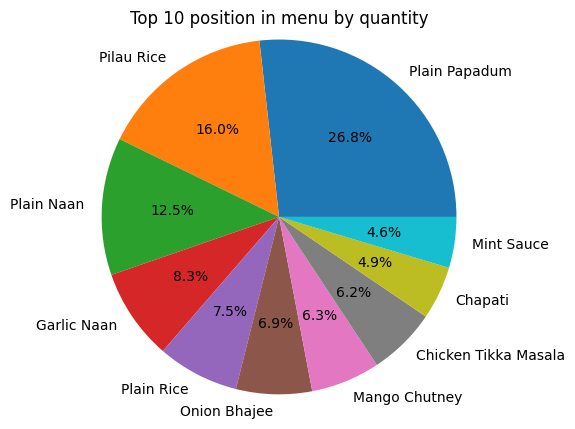

In [97]:
fig, ax = plt.subplots()
ax.pie(
        top_10_products,
    radius=1.2,
    labels=top_10_products.index,
    autopct="%1.1f%%"
)
ax.set_title("Top 10 position in menu by quantity")

# Task 2
Calculate `Item Price` (Product Price * Quantity) for each Order Item in dataframe.
And Make the same Top 10 pie chart, but this time by `Item Price`. So this chart should describe not the most popular products by quantity, but which products (top 10) make the most money for restaurant. It should be also with percentage.

In [99]:
restaurant["item_price"] = restaurant["price"] * restaurant["quantity"]
product_income = restaurant.groupby("name")["item_price"].sum()
top_10_products_income = product_income.nlargest(10)
top_10_products_income

name
Chicken Tikka Masala    22133.35
Pilau Rice              18782.65
Plain Naan              12955.80
Korma                   12261.50
Bombay Aloo             10894.45
Onion Bhajee            10858.55
Butter Chicken          10626.60
Garlic Naan              9788.10
Korma - Chicken          9764.45
Plain Rice               8743.80
Name: item_price, dtype: float64

Text(0.5, 1.0, 'Top 10 position in menu by income')

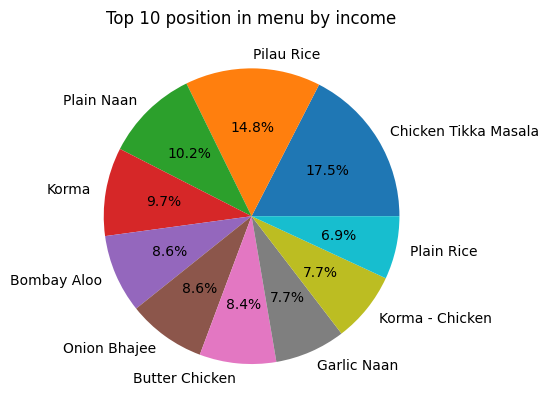

In [102]:
fig, ax = plt.subplots()
ax.pie(
        top_10_products_income,
    radius=1,
    labels=top_10_products_income.index,
    autopct="%1.1f%%"
)
ax.set_title("Top 10 position in menu by income")

# Task 3
Calculate `Order Hour` based on `Order Datetime`, which will tell about the specific our the order was created (from 0 to 23). Using `Order Hour` create a bar chart, which will tell the total restaurant income based on the hour order was created. So on x-axis - it will be values from 0 to 23 (hours), on y-axis - it will be the total sum of order prices, which were sold on that hour.

Example:

![bar chart](../demo/bar.png)

In [109]:
restaurant["order_hour"] = restaurant["datetime"].dt.hour.astype("int8")
income_by_hours = restaurant.groupby("order_hour")["item_price"].sum()
income_by_hours

order_hour
0        177.95
1         54.65
2        199.25
3          8.90
4         63.45
5         57.40
6        121.60
8        447.70
9        570.60
10      1250.35
11      3807.05
12     10565.85
13      8282.65
14      3343.55
15      3781.70
16     15634.75
17     72110.20
18    132462.50
19    109045.05
20     50218.25
21     21480.30
22     11001.50
23       373.25
Name: item_price, dtype: float64

([<matplotlib.axis.XTick at 0x1eae0430a50>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23')])

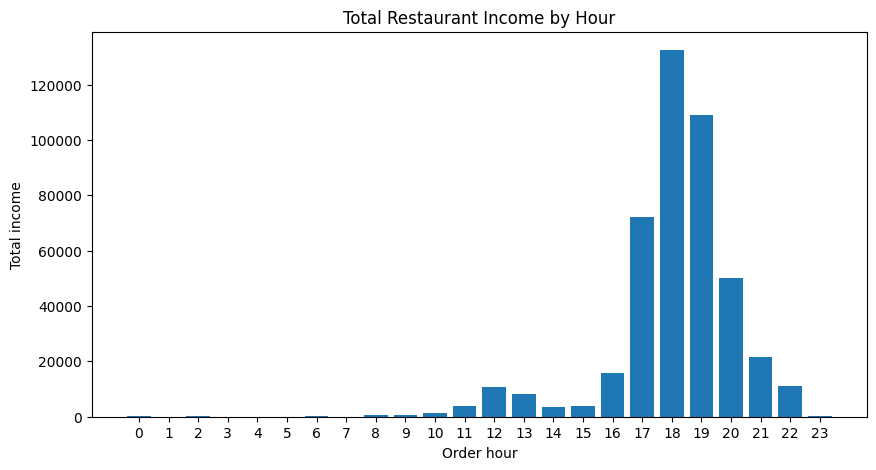

In [123]:
fig = plt.figure(figsize = (10, 5))
plt.bar(income_by_hours.index, income_by_hours.values)
plt.xlabel("Order hour")
plt.ylabel("Total income")
plt.title("Total Restaurant Income by Hour")
plt.xticks(np.arange(0, 24, 1))

# Task 4
Make similar bar chart, but right now with `Order Day Of The Week` (from Monday to Sunday), and also analyze total restaurant income by each day of the week.

In [130]:
restaurant["order_day"] = restaurant["datetime"].dt.dayofweek.astype("int8")
income_by_days = restaurant.groupby("order_day")["item_price"].sum()
income_by_days

order_day
0     40008.30
1     38145.65
2     41246.20
3     46021.55
4    100339.15
5    112191.65
6     67105.95
Name: item_price, dtype: float64

Text(0.5, 1.0, 'Total Restaurant Income by Days')

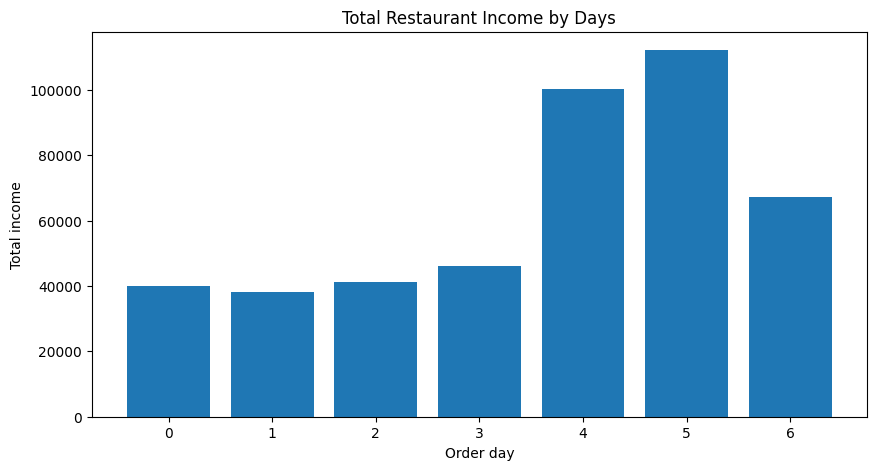

In [132]:
fig = plt.figure(figsize = (10, 5))
plt.bar(income_by_days.index, income_by_days.values)
plt.xlabel("Order day")
plt.ylabel("Total income")
plt.title("Total Restaurant Income by Days")